In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("Data/Pre-Processing-v0.1.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000


In [3]:
corr_list = []
x = data.drop(['SalePrice'], axis=1)
for column in x.columns:
    correlation = data[column].corr(data['SalePrice'])
    corr_list.append(abs(correlation))

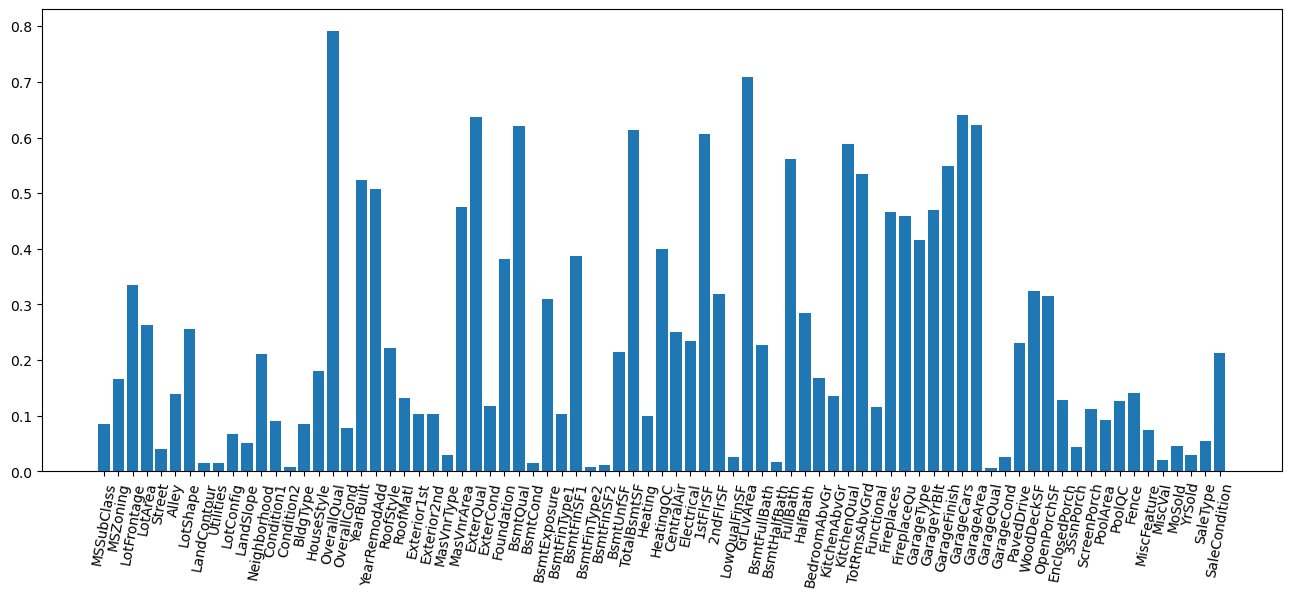

In [4]:
fig, ax = plt.subplots(figsize = (16,6))
plt.bar(x.columns, corr_list)
plt.xticks(rotation=80)
plt.show()

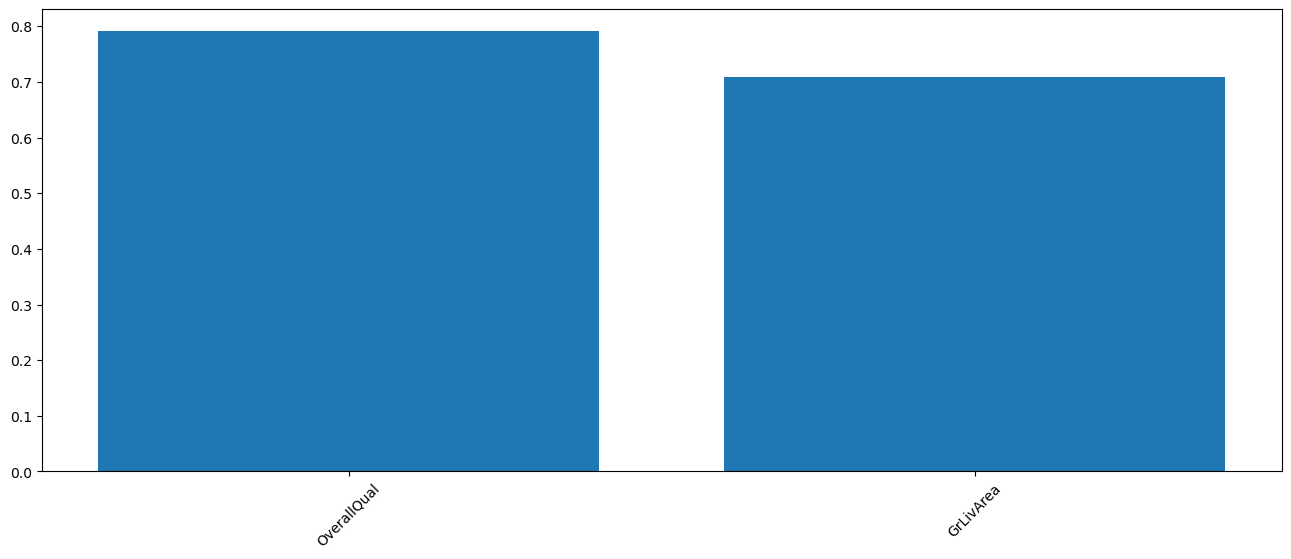

In [5]:
corr_rate = 0.7
filtered_column = [num for num, corr in zip(x.columns, corr_list) if corr > corr_rate]
filtered_corr_list = [corr for corr in corr_list if corr > corr_rate]


fig, ax = plt.subplots(figsize = (16,6))
plt.bar(filtered_column, filtered_corr_list)
plt.xticks(rotation=45)
plt.show()

In [6]:
filtered_out_column = [num for num in x.columns if num not in filtered_column]

data = data.drop(filtered_out_column, axis = 1)

data

,OverallQual,GrLivArea,SalePrice
0,7,1710,208500
1,6,1262,181500
2,7,1786,223500
3,7,1717,140000
4,8,2198,250000
...,...,...,...
1455,6,1647,175000
1456,6,2073,210000
1457,7,2340,266500
1458,5,1078,142125


In [7]:
data.to_csv('Data/Pre-Processing-v0.2.csv', index=False)